# **Project-2**

***Project Title:*** Website Scam Predictor

***Project Description:*** In this project, you will build a machine learning model to predict whether a web page is legitimate or not based on their features such as number of slash, number of comma, number of underline, etc.

***Dataset Details:*** The data set contains over 100077 records of webpages. The dataset has nineteen features (e.g., number of slash, number of comma, number of underline, etc.) and one target variable that indicates whether the web page legitimate or not.

length_url: Length of the url

num_dots: Number of dot (.) in the url

num_questionmark: Number of question mark (?) in the url

num_hypens: Number of hypen (-) in the url

num_underline: Number of underline (_) in the url

num_slash: Number of slash (/) in the url

num_equal: Number of equal (=) in the url

num_at: Number of at (@) in the url

num_and: Number of and (&) in the url

num_exclamation: Number of exclamation (!) in the url

num_space: Number of space ( ) in the url

num_tilde: Number of tilde (~) in the url

num_comma: Number of comma (,) in the url

num_plus: Number of plus (+) in the url

num_asterisk: Number of asterisk (*) in the url

num_hastag: Number of hastag (#) in the url

num_dollar: Number of dollar ($) in the url

num_percent: Number of percent (%) in the url

num_redirection: Number of redirections in the url

outcome: 1 is Phishing website, 0 is Legitimate website

***Datasets Location:*** Canvas -> Modules -> Week 10 -> Datasets -> **"web.csv"**.

***Tasks:***

1) *Data Exploration and Preprocessing:* You will explore the data set, handle missing values, perform feature engineering, and preprocess the data to get it ready for model building.

2) *Model Building:* You will train and evaluate several machine learning models on the preprocessed data set.

3) *Model Evaluation:* You will evaluate the models' performance using several metrics such as accuracy, precision, recall, F1-score, and ROC curve analysis. You will also compare the models' performance and select the best-performing one.

4) *Deployment:* Once you have selected the best-performing model, you will deploy it and make predictions on new, unseen data.

This project will give you hands-on experience with supervised classification, data preprocessing, and model evaluation.


In [2]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#Reading the .csv file
web = pd.read_csv("web.csv")

**Data Exploration and Preprocessing**

In [3]:
#Display the dataset
print(web.head())

   lentgh_url  num_dots  num_hypens  num_underline  num_slash  \
0          37         3           0              0          0   
1          77         1           0              0          0   
2         126         4           1              2          0   
3          18         2           0              0          0   
4          55         2           2              0          0   

   num_questionmark  num_equal  num_at  num_and  num_exclamation  num_space  \
0                 0          0       0        0                0          0   
1                 0          0       0        0                0          0   
2                 1          3       0        2                0          0   
3                 0          0       0        0                0          0   
4                 0          0       0        0                0          0   

   num_tilde  num_comma  num_plus  num_asterisk  num_hastag  num_dollar  \
0          0          0         0             0           0

In [4]:
#Displaying the datatype, number of non-null values along with memory usage
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   lentgh_url        100077 non-null  int64
 1   num_dots          100077 non-null  int64
 2   num_hypens        100077 non-null  int64
 3   num_underline     100077 non-null  int64
 4   num_slash         100077 non-null  int64
 5   num_questionmark  100077 non-null  int64
 6   num_equal         100077 non-null  int64
 7   num_at            100077 non-null  int64
 8   num_and           100077 non-null  int64
 9   num_exclamation   100077 non-null  int64
 10  num_space         100077 non-null  int64
 11  num_tilde         100077 non-null  int64
 12  num_comma         100077 non-null  int64
 13  num_plus          100077 non-null  int64
 14  num_asterisk      100077 non-null  int64
 15  num_hastag        100077 non-null  int64
 16  num_dollar        100077 non-null  int64
 17  num_percen

In [5]:
#Understanding the statistics of the dataset
print(web.describe())

          lentgh_url       num_dots     num_hypens  num_underline  \
count  100077.000000  100077.000000  100077.000000  100077.000000   
mean       39.177683       2.224397       0.405188       0.137724   
std        47.971847       1.255046       1.285465       0.723995   
min         4.000000       1.000000       0.000000       0.000000   
25%        18.000000       2.000000       0.000000       0.000000   
50%        24.000000       2.000000       0.000000       0.000000   
75%        44.000000       2.000000       0.000000       0.000000   
max      4165.000000      24.000000      43.000000      21.000000   

           num_slash  num_questionmark      num_equal         num_at  \
count  100077.000000     100077.000000  100077.000000  100077.000000   
mean        1.135386          0.024391       0.215834       0.022143   
std         1.828526          0.167789       0.959802       0.268393   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.0000

In [6]:
print(web.shape)

(100077, 20)


In [7]:
# Check for missing values
print(web.isnull().sum())

lentgh_url          0
num_dots            0
num_hypens          0
num_underline       0
num_slash           0
num_questionmark    0
num_equal           0
num_at              0
num_and             0
num_exclamation     0
num_space           0
num_tilde           0
num_comma           0
num_plus            0
num_asterisk        0
num_hastag          0
num_dollar          0
num_percent         0
num_redirection     0
outcome             0
dtype: int64


There are no missing values present in the dataset as observed above.

**Model Building**

**Train and Test Data Split**

In [8]:
# Split the dataset into features and target variable
X = web.drop('outcome', axis=1)
y = web['outcome']

In [9]:
from sklearn.model_selection import train_test_split

#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (80061, 19)
Testing set shape: (20016, 19)


In [11]:
#Importing the necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

**Model Evaluation**

**KNN (K Nearest Neighbors)**

In [12]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the evaluation metrics
accuracy_knn = accuracy_score(y_test, knn_y_pred)
precision_knn = precision_score(y_test, knn_y_pred)
recall_knn = recall_score(y_test, knn_y_pred)
f1_knn = f1_score(y_test, knn_y_pred)
confusion_matrix_knn = confusion_matrix(y_test, knn_y_pred)
specificity_knn = confusion_matrix_knn[0, 0] / (confusion_matrix_knn[0, 0] + confusion_matrix_knn[0, 1])
roc_auc_knn = roc_auc_score(y_test, knn_y_pred)

print("K-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("Confusion matrix:", confusion_matrix_knn)
print("Specificity:", specificity_knn)
print("ROC AUC Score:", roc_auc_knn)


K-Nearest Neighbors (KNN):
Accuracy: 0.8863409272581935
Precision: 0.8619204822735754
Recall: 0.8205793932768516
F1-Score: 0.8407420371018551
Confusion matrix: [[11736   962]
 [ 1313  6005]]
Specificity: 0.9242400378012285
ROC AUC Score: 0.87240971553904


Accuracy of KNN is 88.6%

**Logistic Regression**

In [13]:
# Initialize and train the Logistic Regression model
logistic_reg_model = LogisticRegression(random_state=42)
logistic_reg_model.fit(X_train, y_train)

# Predict on the test set
lr_y_pred = logistic_reg_model.predict(X_test)

# Evaluation metrics
accuracy_lr = accuracy_score(y_test, lr_y_pred)
precision_lr = precision_score(y_test, lr_y_pred)
recall_lr = recall_score(y_test, lr_y_pred)
f1_lr = f1_score(y_test, lr_y_pred)
confusion_matrix_lr = confusion_matrix(y_test, lr_y_pred)
specificity_lr = confusion_matrix_lr[0, 0] / (confusion_matrix_lr[0, 0] + confusion_matrix_lr[0, 1])
roc_auc_lr = roc_auc_score(y_test, lr_y_pred)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)
print("Confusion matrix:", confusion_matrix_lr)
print("Specificity:", specificity_lr)
print("ROC AUC Score:", roc_auc_lr)


Accuracy: 0.8568645083932853
Precision: 0.8671063478977741
Recall: 0.7186389723968297
F1-Score: 0.7859224389150414
Confusion matrix: [[11892   806]
 [ 2059  5259]]
Specificity: 0.936525437076705
ROC AUC Score: 0.8275822047367672


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression is 85.6%

**Decision Tree**

In [14]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluation metrics
accuracy_dt = accuracy_score(y_test, dt_y_pred)
precision_dt = precision_score(y_test, dt_y_pred)
recall_dt = recall_score(y_test, dt_y_pred)
f1_dt = f1_score(y_test, dt_y_pred)
confusion_matrix_dt = confusion_matrix(y_test, dt_y_pred)
specificity_dt = confusion_matrix_dt[0, 0] / (confusion_matrix_dt[0, 0] + confusion_matrix_dt[0, 1])
roc_auc_dt = roc_auc_score(y_test, dt_y_pred)

print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)
print("Confusion matrix:", confusion_matrix_dt)
print("Specificity:", specificity_dt)
print("ROC AUC Score:", roc_auc_dt)


Decision Tree:
Accuracy: 0.8830435651478817
Precision: 0.8620689655172413
Recall: 0.8096474446570101
F1-Score: 0.8350362906067225
Confusion matrix: [[11750   948]
 [ 1393  5925]]
Specificity: 0.9253425736336431
ROC AUC Score: 0.8674950091453266


Accuracy of Decision Tree is 88.3%

**Random Forest**

In [15]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Predict on the test data
rf_y_pred = rf_model.predict(X_test)

# Evaluation metrics
accuracy_rf = accuracy_score(y_test, rf_y_pred)
precision_rf = precision_score(y_test, rf_y_pred)
recall_rf = recall_score(y_test, rf_y_pred)
f1_rf = f1_score(y_test, rf_y_pred)
confusion_matrix_rf = confusion_matrix(y_test, rf_y_pred)
specificity_rf = confusion_matrix_rf[0, 0] / (confusion_matrix_rf[0, 0] + confusion_matrix_rf[0, 1])
roc_auc_rf = roc_auc_score(y_test, rf_y_pred)

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print("Confusion matrix:", confusion_matrix_rf)
print("Specificity:", specificity_rf)
print("ROC AUC Score:", roc_auc_rf)


Random Forest:
Accuracy: 0.8921862509992007
Precision: 0.861851332398317
Recall: 0.8397103033615742
F1-Score: 0.8506367663344406
Confusion matrix: [[11713   985]
 [ 1173  6145]]
Specificity: 0.9224287289336903
ROC AUC Score: 0.8810695161476323


Accuracy of Random Forest is 89.2%

**Naive Bayes**

In [16]:
# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
nb_y_pred = nb_model.predict(X_test)

# Evaluation Metrics
accuracy_nb = accuracy_score(y_test, nb_y_pred)
precision_nb = precision_score(y_test, nb_y_pred)
recall_nb = recall_score(y_test, nb_y_pred)
f1_nb = f1_score(y_test, nb_y_pred)
confusion_matrix_nb = confusion_matrix(y_test, nb_y_pred)
specificity_nb = confusion_matrix_nb[0, 0] / (confusion_matrix_nb[0, 0] + confusion_matrix_nb[0, 1])
roc_auc_nb = roc_auc_score(y_test, nb_y_pred)

print("Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-Score:", f1_nb)
print("Confusion matrix:", confusion_matrix_nb)
print("Specificity:", specificity_nb)
print("ROC AUC Score:", roc_auc_nb)


Naive Bayes:
Accuracy: 0.7156274980015987
Precision: 0.8864068441064639
Recall: 0.25485105220005466
F1-Score: 0.395881978348546
Confusion matrix: [[12459   239]
 [ 5453  1865]]
Specificity: 0.9811781382894944
ROC AUC Score: 0.6180145952447745


Accuracy of Naive Bayes is 71.5%. Compared to other models it does not perform well.

**SVM (Support Vector Machine)**

In [17]:
# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test set
svm_y_pred = svm_model.predict(X_test)

# Evaluation metrics
accuracy_svm = accuracy_score(y_test, svm_y_pred)
precision_svm = precision_score(y_test, svm_y_pred)
recall_svm = recall_score(y_test, svm_y_pred)
f1_svm = f1_score(y_test, svm_y_pred)
confusion_matrix_svm = confusion_matrix(y_test, svm_y_pred)
specificity_svm = confusion_matrix_svm[0, 0] / (confusion_matrix_svm[0, 0] + confusion_matrix_svm[0, 1])
roc_auc_svm = roc_auc_score(y_test, svm_y_pred)

print("Support Vector Machine (SVM):")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("Confusion matrix:", confusion_matrix_svm)
print("Specificity:", specificity_svm)
print("ROC AUC Score:", roc_auc_svm)

Support Vector Machine (SVM):
Accuracy: 0.8668065547561951
Precision: 0.8493541604085311
Recall: 0.7727521180650451
F1-Score: 0.8092444190040068
Confusion matrix: [[11695  1003]
 [ 1663  5655]]
Specificity: 0.9210111828634431
ROC AUC Score: 0.846881650464244


Accuracy of SVM is 86.6%

From the above models, **Random Forest** gives the highest accuracy.

Now, I will check the same results using ROC Curve

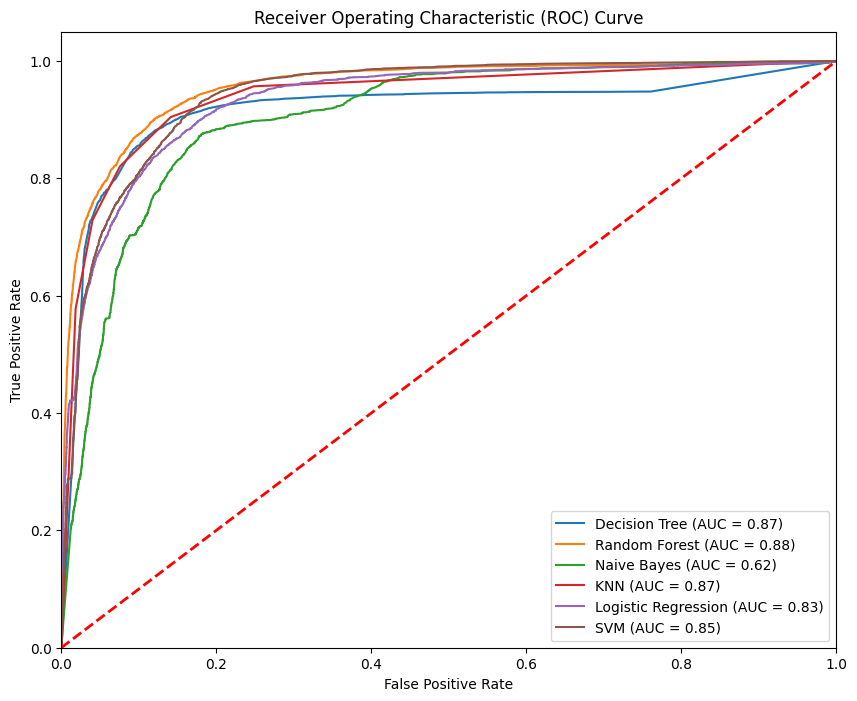

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = roc_auc_score(y_test, knn_y_pred)

# Logistic Regression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logistic_reg_model.predict_proba(X_test)[:, 1])
roc_auc_logreg = roc_auc_score(y_test, lr_y_pred)

# Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_dt = roc_auc_score(y_test, dt_y_pred)

# Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_y_pred)

# Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
roc_auc_nb = roc_auc_score(y_test, nb_y_pred)

# SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc_svm = roc_auc_score(y_test, svm_y_pred)

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {roc_auc_logreg:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The ROC Curve shows that the best model is Random Forest model.

I will now try performing Feature selection since none of the models showcased good accuracy. The model that performs better is determined by selecting features based on the maximum correlation.  

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for predictions
best_rf_model = grid_search.best_estimator_
rf_pred = best_rf_model.predict(X_test)

# Evaluate the Random Forest model with the best parameters
accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)
roc_auc_rf = roc_auc_score(y_test, rf_pred)
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
specificity_rf = conf_matrix_rf[0, 0] / (conf_matrix_rf[0, 0] + conf_matrix_rf[0, 1])

print("Random Forest (with best parameters from GridSearchCV):")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print("ROC AUC Score:", roc_auc_rf)
print("Confusion matrix:", conf_matrix_rf)
print("Specificity:", specificity_rf)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest (with best parameters from GridSearchCV):
Accuracy: 0.8954836131095124
Precision: 0.8599173553719008
Recall: 0.8531019404208801
F1-Score: 0.856496089998628
ROC AUC Score: 0.8865052937259542
Confusion matrix: [[11681  1017]
 [ 1075  6243]]
Specificity: 0.9199086470310285


As observed the Accuracy with GridSearchCV for Random Forest is 89.54% which is higher compared to the other models. Hence, after comparing all the models, Random Forest comes out to be the best model for the given dataset.